In [182]:
import os
import pandas as pd
from fastbook import *
from fastai.tabular.all import *
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from dtreeviz.trees import *
import sklearn

def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

traindf = pd.read_csv('/mnt/c/Users/jsult/Desktop/spacetitanic3/train.csv',low_memory=False)
testdf = pd.read_csv('/mnt/c/Users/jsult/Desktop/spacetitanic3/test.csv',low_memory= False)



In [179]:
len(testdf)

4277

In [181]:
testdf.dropna(inplace = True)
len(testdf)

3281

In [2]:
cryodict = {'RoomService':0,'FoodCourt' : 0, 'ShoppingMall' : 0, 'Spa' : 0, 'VRDeck' : 0}
spending = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [5]:
list(cryodict.keys())

['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [1]:
cryodict = {'RoomService':0,'FoodCourt' : 0, 'ShoppingMall' : 0, 'Spa' : 0, 'VRDeck' : 0}
testdf.loc[traindf.CryoSleep == True, list(cryodict.keys())] = testdf.loc[traindf.CryoSleep == True, list(cryodict.keys())].fillna(value=cryodict)


NameError: name 'testdf' is not defined

In [184]:
testdf.dropna(inplace = True)
len(testdf)

3420

In [167]:
cryodict = {'RoomService':0,'FoodCourt' : 0, 'ShoppingMall' : 0, 'Spa' : 0, 'VRDeck' : 0}
spending = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

traindf.loc[traindf.CryoSleep == True, spending] = traindf.loc[traindf.CryoSleep == True, spending].fillna(value=cryodict)


In [168]:
traindf.dropna(inplace = True)

In [169]:
len(traindf)

6907

In [170]:
nas = list(testdf.isna().sum(axis = 1))
indexes = list(testdf.index)
keepinds = []
dropinds = []
for i in range(len(indexes)):
    if nas[i] == 0:
        keepinds.append(i)
    else:
        dropinds.append(i)
droptest = testdf.loc[dropinds].copy()
testdf = testdf.loc[keepinds].copy()

/home/jakeunix/miniforge3/envs/sptitanic/lib/python3.11/site-packages/fastai/data/transforms.py:225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/jakeunix/miniforge3/envs/sptitanic/lib/python3.11/site-packages/fastai/tabular/core.py:233: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/jakeunix/miniforge3/envs/sptitanic/lib/python3.11/site-packages/fastai/tabular/core.py:233: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/jakeunix/miniforge3/envs/sptitanic/lib/python3.11/site-packages/fastai/tabular/core.py:233: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/jakeunix/miniforge3/envs/sptitanic/lib/pyth

decision tree prediction 0.774800868935554


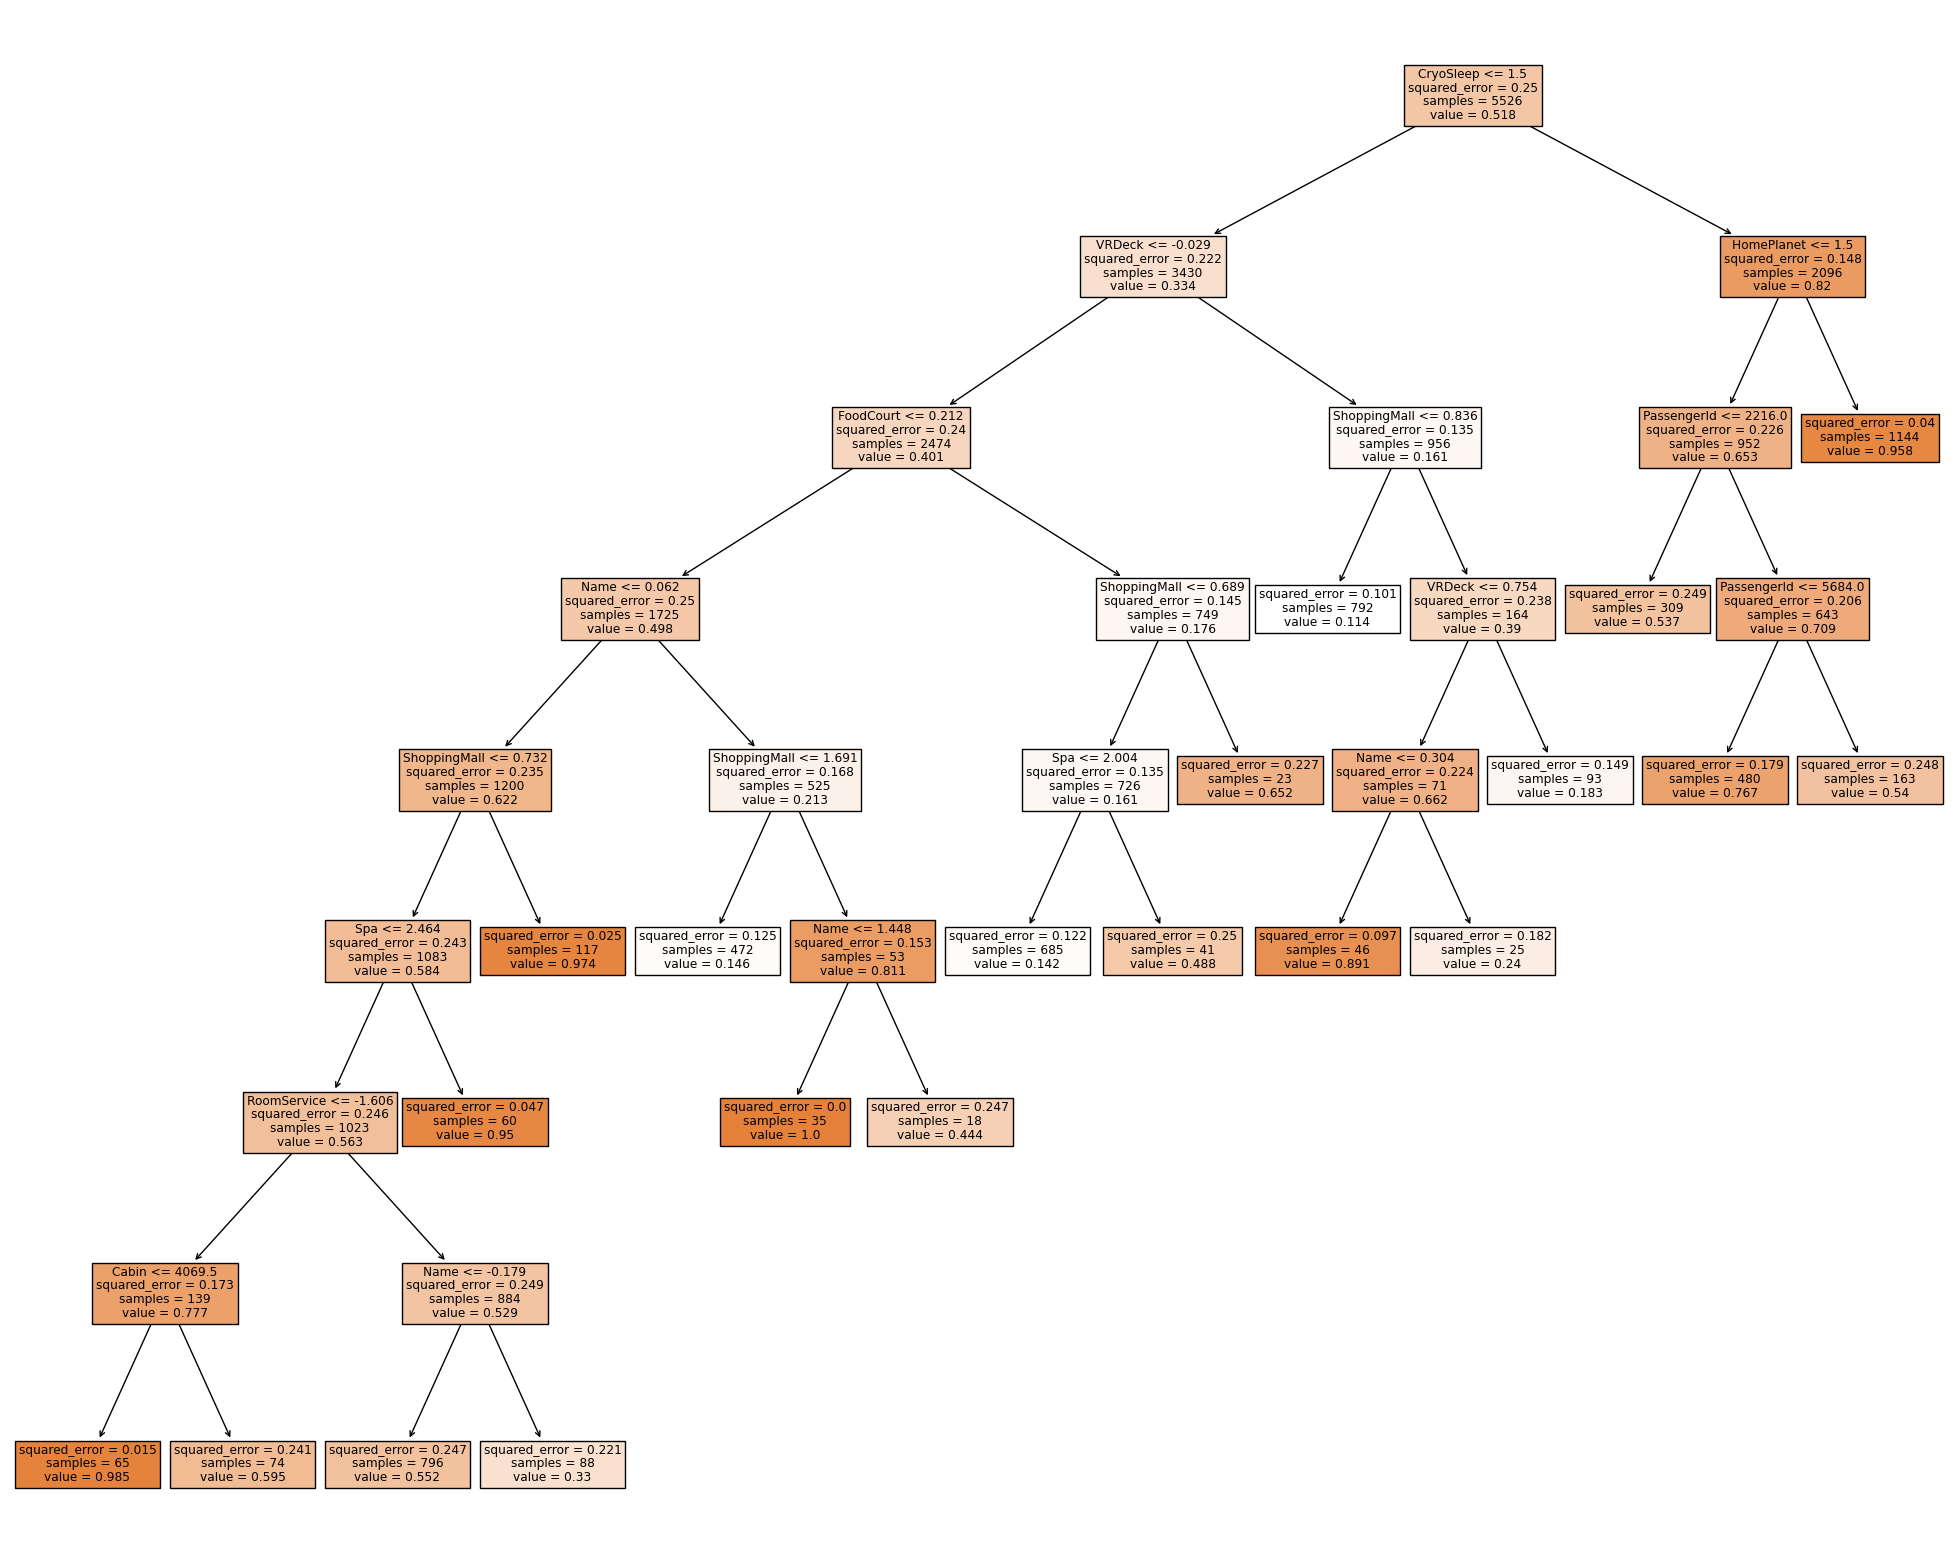

In [171]:




splits = RandomSplitter(seed = 1)(range_of(traindf))
dep_var = 'Transported'
procs = [Categorify,FillMissing,Normalize]
cont,cat = cont_cat_split(traindf, 1, dep_var=dep_var)
to = TabularPandas(traindf, procs, cat, cont, y_names=dep_var,splits = splits)

xs,y = to.train.xs,to.train.y
valid_xs, valid_y = to.valid.xs, to.valid.y

m = DecisionTreeRegressor(max_leaf_nodes=20)
m.fit(xs, y)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(m,
                   feature_names= traindf.columns,
                   filled=True)

print('decision tree prediction',((m.predict(valid_xs) > 0.5) == valid_y).sum() / len(valid_y))



In [172]:




m = RandomForestClassifier(n_estimators= 100, max_leaf_nodes= 50)
m.fit(xs, y)
preds = m.predict(valid_xs)
print("mae",mean_absolute_error(valid_y, preds))
print('preds', (preds == valid_y).sum() /len(valid_y))




mae 0.2049239681390297
preds 0.7950760318609703


In [173]:



def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

fi = rf_feat_importance(m, xs)
print(fi[:30])



            cols       imp
2      CryoSleep  0.199371
11           Spa  0.154310
8    RoomService  0.137175
12        VRDeck  0.115877
9      FoodCourt  0.094823
10  ShoppingMall  0.091219
3          Cabin  0.066557
1     HomePlanet  0.055976
7            Age  0.033352
0    PassengerId  0.023347
6           Name  0.017638
4    Destination  0.009950
5            VIP  0.000404


In [174]:
testdf

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4269,9263_01,Earth,True,G/1495/S,TRAPPIST-1e,43.0,False,0.0,0.0,0.0,0.0,0.0,Loisey Heney
4270,9265_01,Mars,False,D/278/S,TRAPPIST-1e,43.0,False,47.0,0.0,3851.0,0.0,0.0,Toate Cure
4271,9266_01,Earth,False,F/1796/S,TRAPPIST-1e,40.0,False,0.0,865.0,0.0,3.0,0.0,Danna Peter
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter


In [175]:
cont,cat = cont_cat_split(testdf, 1, dep_var=dep_var)
mode_values = testdf[cat].mode().iloc[0]
testdf[cat] = testdf[cat].fillna(mode_values)



to_new = to.train.new(testdf)
to_new.process()


droptest['Transported'] = False
droptest = droptest[['PassengerId','Transported']]

testdf['Transported'] = [x == 1 for x in m.predict(to_new.xs)]
testdf = testdf[['PassengerId','Transported']]

result = pd.concat([droptest,testdf])
result = result.sort_index()

result.to_csv('submit.csv',index=False)


/home/jakeunix/miniforge3/envs/sptitanic/lib/python3.11/site-packages/fastai/tabular/core.py:233: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/jakeunix/miniforge3/envs/sptitanic/lib/python3.11/site-packages/fastai/tabular/core.py:233: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/jakeunix/miniforge3/envs/sptitanic/lib/python3.11/site-packages/fastai/tabular/core.py:233: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/jakeunix/miniforge3/envs/sptitanic/lib/python3.11/site-packages/fastai/tabular/core.py:233: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/jakeunix/miniforge3/envs/sptitanic/lib/python3

In [176]:
result

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [177]:
(oldresult.Transported == result.Transported).sum()

4194

In [ ]:
3-01 new